# Generating test data (P3 experiment)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


### (1) Define generation parameters

In [2]:
# Number of measurements to generate

Nevt = 1000

# All times in µs

# Muon lifetime (average decay time)

tdec = 2.2

# Average time between two passing muons

tnext = 400000   # 0.4s

# Time measurement range

tmax = 100

# Probability of muon stopping and decaying in the counter

fdec=0.001


### (2) Generate events

In [3]:
# Allocate result table

ttab = np.zeros(Nevt)

ievt = 0

# Run the experiment, and count detected muons "decays"...

while ievt<Nevt:

    # Muon detected in counter: 
    #   if it stopped, wait for its decay
    #   if not, wait for the next cosmic muon
    
    if np.random.uniform() < fdec: 
        tmean = tdec
    else:
        tmean = tnext
    
    # Generate time for second pulse from exponential distribution
    
    tgen = tmean*np.random.exponential()
    
    # Store generated time only, if within the measurement range
    
    if tgen < tmax:    
        ttab[ievt]=tgen
        ievt+=1        

    # Generation for this event (ievt) is repeated, if measurement not stored        

In [4]:
outfile = "11_example_data_"+str(Nevt)+".dat"

# Store data to file

ttab.tofile(outfile," ","%8.3f")


### (3) Plot results

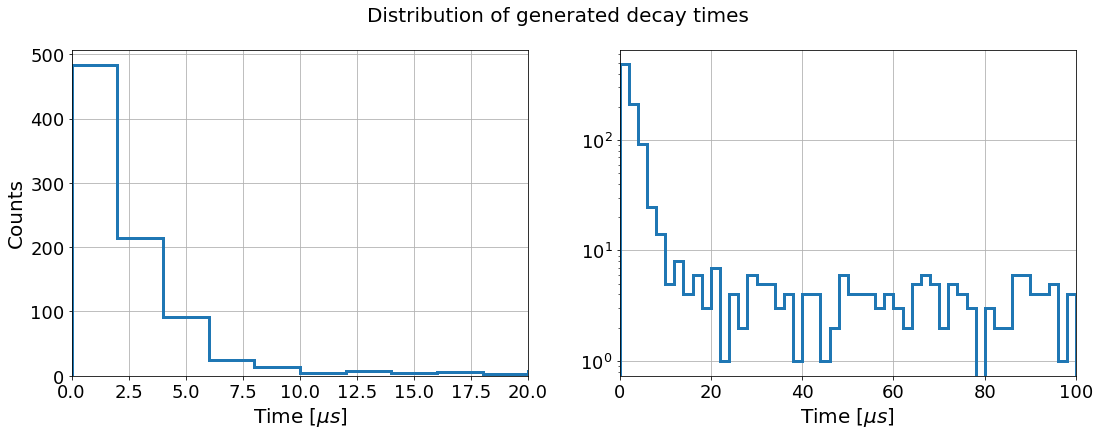

In [5]:
Nbin = 50   

# plt.figure(figsize=(9, 6))

plt.subplots(1,2,figsize=(18, 6))

plt.suptitle('Distribution of generated decay times',fontsize=20)

plt.subplot(121)
plt.hist(ttab,range=[0,tmax],bins=Nbin,log=False, histtype='step',linewidth=3)
plt.xlim([0,20.])

# plt.title('Distribution of generated decay times',size=20,loc='left')
plt.ylabel('Counts',size=20)
plt.xlabel('Time [$\mu s$]',size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

plt.subplot(122)
plt.hist(ttab,range=[0,tmax],bins=Nbin,log=True, histtype='step',linewidth=3)
plt.xlim([0,tmax])

# plt.title('Distribution of generated decay times',size=20,loc='left')
# plt.ylabel('Counts',size=20)
plt.xlabel('Time [$\mu s$]',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')


fname = '11_example_data_'+str(Nevt)+'_'+str(Nbin)+'.png'
plt.savefig(fname)